In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import os 
import seaborn as sns
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")


no display found. Using non-interactive Agg backend


# Upload, explore, clean, and preprocess data

In [2]:
train_df = pd.read_csv('Train.csv')
train_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      train_df.shape )

Number of rows and columns in data set: (10999, 12)


In [4]:
# Display the column names.
print('Original column titles:')
train_df.columns

Original column titles:


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
print('Modified column titles with no space and one word for titles:')
train_df.columns = [s.strip().replace('.', '_') for s in train_df.columns]
train_df.columns

Modified column titles with no space and one word for titles:


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_Time_Y_N'],
      dtype='object')

In [6]:
# Display column data types. 
train_df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached_on_Time_Y_N     int64
dtype: object

In [7]:
train_df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time_Y_N    0
dtype: int64

In [8]:
# convert some columns into categorical variable.
train_df.Customer_rating = train_df.Customer_rating.astype('category')
train_df.Warehouse_block = train_df.Warehouse_block.astype('category')
train_df.Mode_of_Shipment = train_df.Mode_of_Shipment.astype('category')
train_df.Product_importance = train_df.Product_importance.astype('category')
train_df.Gender = train_df.Gender.astype('category')

In [9]:
# Display column data types. 
train_df.dtypes

ID                        int64
Warehouse_block        category
Mode_of_Shipment       category
Customer_care_calls       int64
Customer_rating        category
Cost_of_the_Product       int64
Prior_purchases           int64
Product_importance     category
Gender                 category
Discount_offered          int64
Weight_in_gms             int64
Reached_on_Time_Y_N       int64
dtype: object

In [10]:
#Convert the categorical data into dummy variables
train_df = pd.get_dummies(train_df, prefix_sep='_', drop_first=True)
print(train_df.head(10))

   ID  Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
0   1                    4                  177                3   
1   2                    4                  216                2   
2   3                    2                  183                4   
3   4                    3                  176                4   
4   5                    2                  184                3   
5   6                    3                  162                3   
6   7                    3                  250                3   
7   8                    4                  233                2   
8   9                    3                  150                3   
9  10                    3                  164                3   

   Discount_offered  Weight_in_gms  Reached_on_Time_Y_N  Warehouse_block_B  \
0                44           1233                    1                  0   
1                59           3088                    1                  0   
2                

In [11]:
# Display column data types. 
train_df.dtypes

ID                           int64
Customer_care_calls          int64
Cost_of_the_Product          int64
Prior_purchases              int64
Discount_offered             int64
Weight_in_gms                int64
Reached_on_Time_Y_N          int64
Warehouse_block_B            uint8
Warehouse_block_C            uint8
Warehouse_block_D            uint8
Warehouse_block_F            uint8
Mode_of_Shipment_Road        uint8
Mode_of_Shipment_Ship        uint8
Customer_rating_2            uint8
Customer_rating_3            uint8
Customer_rating_4            uint8
Customer_rating_5            uint8
Product_importance_low       uint8
Product_importance_medium    uint8
Gender_M                     uint8
dtype: object

# Logistic Regression Model

In [12]:
#Create predictors X and outcome y variables to run Logistic Regression modelvariables
X = train_df.drop(columns=['Reached_on_Time_Y_N'])
y = train_df['Reached_on_Time_Y_N']

# Partition data into training (60% or 0.6) and validation(40% or 0.4) or the data frame
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)


# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.747
Coefficients for Predictors
         ID  Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
Coeff: -0.0               -0.022                  0.0           -0.022   

        Discount_offered  Weight_in_gms  Warehouse_block_B  Warehouse_block_C  \
Coeff:             0.099           -0.0              0.182              0.215   

        Warehouse_block_D  Warehouse_block_F  Mode_of_Shipment_Road  \
Coeff:              0.108              0.219                  0.128   

        Mode_of_Shipment_Ship  Customer_rating_2  Customer_rating_3  \
Coeff:                  0.114              0.088               0.17   

        Customer_rating_4  Customer_rating_5  Product_importance_low  \
Coeff:              0.161              0.119                   0.027   

        Product_importance_medium  Gender_M  
Coeff:                       0.05    -0.045  


In [13]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=3)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
       Actual  Classification   p(0)   p(1)
7030        0               0  0.672  0.328
2095        1               1  0.014  0.986
7168        1               0  0.507  0.493
7969        0               0  0.681  0.319
6320        1               1  0.487  0.513
6136        0               0  0.518  0.482
4687        1               0  0.523  0.477
9934        1               1  0.432  0.568
7868        0               0  0.619  0.381
4865        0               1  0.463  0.537
4881        1               1  0.475  0.525
8169        1               0  0.612  0.388
623         1               1  0.003  0.997
4399        1               1  0.464  0.536
3906        0               0  0.505  0.495
4195        0               1  0.425  0.575
7623        1               0  0.595  0.405
7467        1               0  0.518  0.482
2456        1               1  0.007  0.993
10326       0               0  0.579  0.421


In [14]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6599)

       Prediction
Actual    0    1
     0 1622 1023
     1 1221 2733

Validation Partition
Confusion Matrix (Accuracy 0.6491)

       Prediction
Actual    0    1
     0 1079  712
     1  832 1777


# Backward Elimination algorithm

In [15]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter=500)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: ID, Customer_care_calls, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms, Warehouse_block_B, Warehouse_block_C, Warehouse_block_D, Warehouse_block_F, Mode_of_Shipment_Road, Mode_of_Shipment_Ship, Customer_rating_2, Customer_rating_3, Customer_rating_4, Customer_rating_5, Product_importance_low, Product_importance_medium, Gender_M
Start: score=11591.52
Step: score=11564.90, remove Mode_of_Shipment_Road
Step: score=11564.90, remove None

Best Variables from Backward Elimination Algorithm
['ID', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Ship', 'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4', 'Customer_rating_5', 'Product_importance_low', 'Product_importance_medium', 'Gender_M']


In [16]:
## Develop the Logistic regression model based on the Backward Elimination results.
X = train_df.drop(columns=['Weight_in_gms','Reached_on_Time_Y_N'])
y = train_df['Reached_on_Time_Y_N']

train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

flight_be = LogisticRegression(max_iter=500)
flight_be.fit(train_X_be, train_y_be)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(flight_be.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(flight_be.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.188
Coefficients for Predictors
         ID  Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
Coeff: -0.0                0.023                0.001           -0.015   

        Discount_offered  Warehouse_block_B  Warehouse_block_C  \
Coeff:             0.103              0.097              0.131   

        Warehouse_block_D  Warehouse_block_F  Mode_of_Shipment_Road  \
Coeff:              0.022              0.128                  0.059   

        Mode_of_Shipment_Ship  Customer_rating_2  Customer_rating_3  \
Coeff:                  0.048              0.027              0.108   

        Customer_rating_4  Customer_rating_5  Product_importance_low  \
Coeff:              0.089              0.056                   0.001   

        Product_importance_medium  Gender_M  
Coeff:                     -0.001    -0.058  


In [17]:
# Confusion matrices for multiple predictors logistic mode, Backward Elimination Algorithm

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y_be, flight_be.predict(train_X_be))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y_be, flight_be.predict(valid_X_be))


Training Partition
Confusion Matrix (Accuracy 0.6577)

       Prediction
Actual    0    1
     0 1576 1069
     1 1190 2764

Validation Partition
Confusion Matrix (Accuracy 0.6452)

       Prediction
Actual    0    1
     0 1035  756
     1  805 1804


# GridSearchCV() algorithm

In [18]:
from sklearn.model_selection import GridSearchCV
X = train_df.drop(columns=['Reached_on_Time_Y_N'])
y = train_df['Reached_on_Time_Y_N']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

grid={"C":np.logspace(-3,3,7), "penalty":["l2","l1"]}

log_reg=LogisticRegression()
log_reg_cv=GridSearchCV(log_reg,grid,cv=5)
log_reg_cv.fit(train_X,train_y)



print("tuned hpyerparameters :(best parameters) ",log_reg_cv.best_params_)
print(f'Improved score:{log_reg_cv.best_score_:.4f}')


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
Improved score:0.6604


In [19]:
# Confusion matrices for multiple predictors logistic mode, Backward Elimination Algorithm

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg_cv.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg_cv.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6587)

       Prediction
Actual    0    1
     0 1634 1011
     1 1241 2713

Validation Partition
Confusion Matrix (Accuracy 0.6570)

       Prediction
Actual    0    1
     0 1098  693
     1  816 1793


# Neural Network Model

In [20]:
# Create outcome and predictors to run neural network model.
X = train_df.drop(columns=['Reached_on_Time_Y_N']) #predictors
y = train_df['Reached_on_Time_Y_N'] #outcome

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (18); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
train_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
train_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Reached_on_Time Neural Network Model')
print(train_clf.intercepts_)

print()
print('Network Weights for Reached_on_Time Neural Network Model')
print(train_clf.coefs_)

Final Intercepts for Reached_on_Time Neural Network Model
[array([-0.21337372,  0.05371923,  0.18752773]), array([-0.08291781])]

Network Weights for Reached_on_Time Neural Network Model
[array([[-1.12650003e+00, -4.77290773e-01, -1.39889375e+00],
       [-1.20420370e-01, -2.13543314e-01,  6.75868473e-02],
       [-2.44410920e-01, -1.23949357e-01,  1.05233075e+01],
       [ 2.22945572e-02, -4.92092303e-02,  3.79603206e-01],
       [-1.89570578e-01,  2.24801055e-01,  2.01004785e+00],
       [-5.45242650e-01, -4.11306204e-01,  6.59672886e-01],
       [-2.16908773e-01, -1.82086423e-01,  1.96806822e-01],
       [ 2.82309849e-01, -1.12497208e-01,  1.61353984e-01],
       [ 2.26938142e-01,  2.37935726e-01, -2.45687852e-01],
       [-2.78108750e-01, -1.99175397e-01,  2.33633240e-01],
       [-2.42262123e-01, -4.75943640e-02,  2.90853029e-01],
       [ 1.97434727e-02,  1.15601038e-01, -6.10481710e-02],
       [ 1.12358190e-01,  2.01741535e-01, -2.88239812e-01],
       [ 1.50786432e-01,  2.9476

In [21]:
# Make Reached_on_Time classification for validation set using neural network model. 
# Use train_clf model to classify Reached_on_Time for validation set.
ontime_pred = train_clf.predict(valid_X)

# Predict Reached_on_time probabilities p(0), p(1) for validation set.
ontime_pred_prob = np.round(train_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for validation set. 
ontime_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in ontime_pred_prob],
                'p(1)': [p[1] for p in ontime_pred_prob],
                'Classification': ontime_pred})

print('Classification Data for Validation Partition')
print(ontime_pred_result.head(20))

Classification Data for Validation Partition
       Actual    p(0)    p(1)  Classification
7030        0  0.5207  0.4793               0
2095        1  0.5207  0.4793               0
7168        1  0.5207  0.4793               0
7969        0  0.5207  0.4793               0
6320        1  0.5207  0.4793               0
6136        0  0.5207  0.4793               0
4687        1  0.5207  0.4793               0
9934        1  0.5207  0.4793               0
7868        0  0.5207  0.4793               0
4865        0  0.5207  0.4793               0
4881        1  0.5207  0.4793               0
8169        1  0.5207  0.4793               0
623         1  0.1216  0.8784               1
4399        1  0.5207  0.4793               0
3906        0  0.1216  0.8784               1
4195        0  0.5207  0.4793               0
7623        1  0.5207  0.4793               0
7467        1  0.5207  0.4793               0
2456        1  0.5207  0.4793               0
10326       0  0.5207  0.4793      

In [22]:
# Confusion matrices for neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, train_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, train_clf.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6280)

       Prediction
Actual    0    1
     0 2403  242
     1 2213 1741

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6239)

       Prediction
Actual    0    1
     0 1641  150
     1 1505 1104


# GridSearch to Improve Neural Network model

In [23]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.6146
Best parameter:  {'hidden_layer_sizes': 5}


In [51]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

train_clf_imp = MLPClassifier(hidden_layer_sizes=(5), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
train_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Neural Network Model')
print(train_clf_imp.intercepts_)

print()
print('Network Weights for Neural Network Model')
print(train_clf_imp.coefs_)

Final Intercepts for Neural Network Model
[array([-0.15139788,  0.22410587,  0.04253887, -0.28701795,  0.13144927]), array([-0.2900028])]

Network Weights for Neural Network Model
[array([[ 3.58012138,  0.84013764, -0.2886051 , -0.11412176, -0.07028592],
       [-0.23353716, -0.23258375, -0.08916432, -0.0596005 ,  0.14819468],
       [ 0.03451444, -1.73929615, -0.17063221,  0.21830318,  0.9418929 ],
       [ 0.1007408 , -0.08543729,  0.03388412, -0.20761982, -0.14565182],
       [ 0.17629437, -0.21969432, -0.10771811,  0.11103598,  5.26320854],
       [ 1.02328697, -0.66537057, -0.26612316, -0.19062086, -0.01304494],
       [-0.23195902, -0.04463298,  0.26435898,  0.01914772,  0.1235252 ],
       [-0.10637539,  0.11114014,  0.19319355, -0.27811254,  0.16388424],
       [ 0.28258489,  0.13887764, -0.12675896,  0.16701318, -0.23142665],
       [-0.03018239,  0.23507062, -0.11915528, -0.12252627, -0.18565509],
       [-0.27742367,  0.10234084, -0.16648928, -0.13535982,  0.02282337],
     

In [52]:
# Confusion matrices for improved neural network model using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, train_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, train_clf_imp.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6751)

       Prediction
Actual    0    1
     0 2634   11
     1 2133 1821

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6809)

       Prediction
Actual    0    1
     0 1786    5
     1 1399 1210


# Clustering

In [26]:
# Set row names (index) to 'ID'
train_df.set_index('ID', inplace=True)

# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
train_df = train_df.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
train_df_norm = (train_df - train_df.mean())/train_df.std()

# Use KMeans() function to create k-means clusters with k=6 (n_clusters=6). 
kmeans_6 = KMeans(n_clusters=6, random_state=0).fit(train_df_norm)

# Develop cluster membership for k-means clusters, k=6.
memb_km6 = pd.Series(kmeans_6.labels_, index=train_df_norm.index)

# Display cluster memberships for 6 clusters.  
print('Cluster Membership for 6 Clusters Using k-Means Clustering')
print()
for key, item in memb_km6.groupby(memb_km6):
    print(str(key) + " : " + str(item.index))
 
    

Cluster Membership for 6 Clusters Using k-Means Clustering

0 : Int64Index([  111,   112,   113,   114,   116,   118,   119,   120,   121,
              122,
            ...
            10946, 10947, 10948, 10949, 10950, 10951, 10952, 10953, 10954,
            10955],
           dtype='int64', name='ID', length=1701)
1 : Int64Index([    7,     9,    26,    33,    68,    72,    75,    79,    92,
              105,
            ...
            10976, 10980, 10981, 10982, 10983, 10986, 10988, 10989, 10994,
            10999],
           dtype='int64', name='ID', length=2507)
2 : Int64Index([    6,    12,    13,    18,    19,    24,    25,    38,    49,
               55,
            ...
            10964, 10968, 10969, 10970, 10977, 10987, 10992, 10993, 10995,
            10998],
           dtype='int64', name='ID', length=2601)
3 : Int64Index([   1,    2,    3,    5,    8,   14,   15,   20,   21,   27,
            ...
            3105, 3108, 3110, 3113, 3114, 3117, 3120, 3121, 3122, 3134]

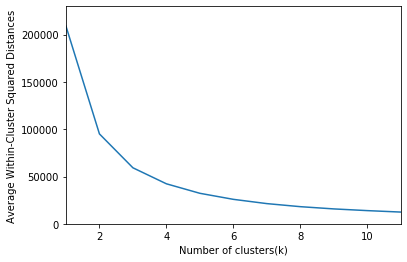

In [27]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [28]:
# Identify  and display cluster centroids (mean values)  
# for each of 8 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_6.cluster_centers_, 
                    columns=train_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 6')
centroids


Cluster Centroids for k-Means Clustering with k = 6


,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Customer_rating_2,Customer_rating_3,Customer_rating_4,Customer_rating_5,Product_importance_low,Product_importance_medium,Gender_M,Cluster
0,3.160e-02,0.043,0.019,-0.115,0.052,-0.047,0.010,0.006,-0.003,-0.007,2.291,-1.452,4.704e-03,-2.228e-02,0.008,9.237e-03,9.609e-04,-0.010,-0.018,Cluster 0
1,1.420e-01,0.122,0.028,-0.405,0.052,-0.176,-0.447,-0.447,0.227,0.344,-0.436,0.269,-3.759e-02,-6.275e-03,0.021,1.520e-02,1.029e+00,-0.872,0.018,Cluster 1
2,1.090e-02,0.022,0.061,-0.400,0.283,-0.167,-0.447,-0.447,0.247,0.342,-0.436,0.274,1.937e-02,2.533e-02,0.003,-3.225e-02,-9.638e-01,0.850,-0.020,Cluster 2
3,-3.653e-01,-0.507,-0.226,2.131,-0.892,0.822,-0.200,-0.206,0.049,0.202,-0.317,0.219,2.440e-02,-3.136e-02,-0.020,2.487e-02,-6.273e-03,-0.070,-0.029,Cluster 3
4,3.836e-02,0.082,-0.002,-0.208,0.089,-0.056,-0.447,2.236,-0.447,-0.707,-0.436,0.280,8.976e-04,-1.371e-04,-0.008,-4.738e-04,-1.863e-02,0.010,0.008,Cluster 4
5,-7.890e-04,0.093,0.034,-0.226,0.084,-0.050,2.236,-0.447,-0.447,-0.707,-0.436,0.274,1.222e-03,2.125e-02,-0.025,-1.920e-03,-2.733e-02,0.051,0.046,Cluster 5


<Figure size 1800x432 with 0 Axes>

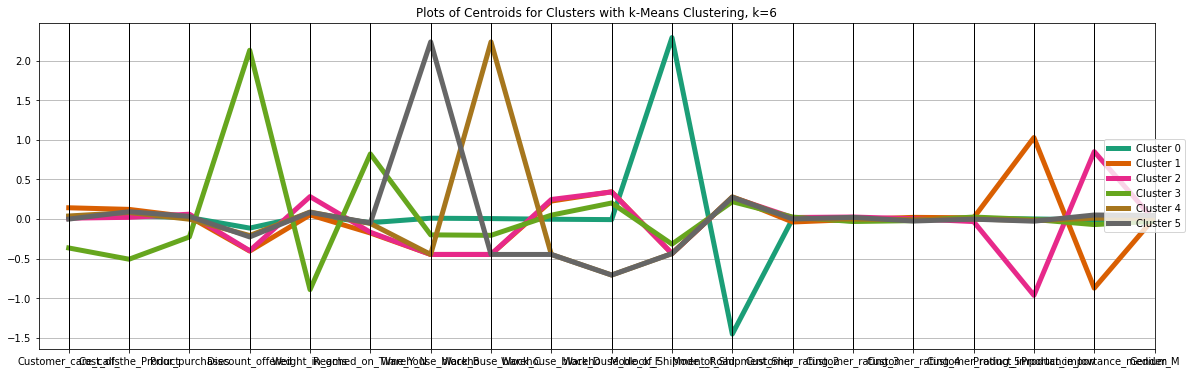

In [29]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
fig = plt.figure(figsize=(25, 6))
plt.figure(figsize=(20,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,18)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=6')
plt.show()


Heatmap for k-Means Clustering with 6 Clusters


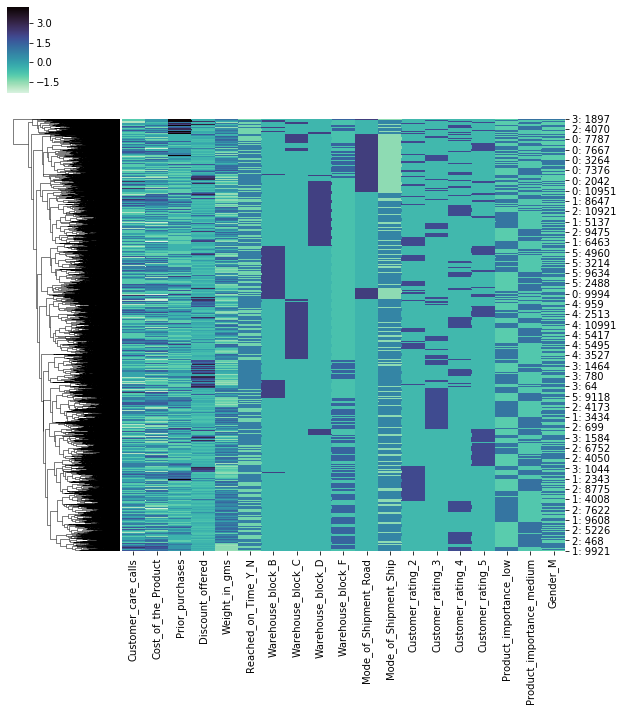

In [30]:
# Create and display heatmap k-mean clustering 
# with centroid method. 
train_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km6, train_df_norm.index)]
sns.clustermap(train_df_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 6 Clusters')
plt.show()

In [31]:
train_df.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached_on_Time_Y_N',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5', 'Product_importance_low',
       'Product_importance_medium', 'Gender_M'],
      dtype='object')

In [32]:
train_df_rate = train_df[['Reached_on_Time_Y_N',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5']]

In [33]:
train_df_rate.head(10)

,Reached_on_Time_Y_N,Customer_rating_2,Customer_rating_3,Customer_rating_4,Customer_rating_5
ID,,,,,
1,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0


In [34]:

# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
train_df_rate = train_df_rate.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
train_df_rate_norm = (train_df_rate - train_df_rate.mean())/train_df_rate.std()

# Use KMeans() function to create k-means clusters with k=6 (n_clusters=6). 
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(train_df_rate_norm)

# Develop cluster membership for k-means clusters, k=4.
memb_km4 = pd.Series(kmeans_4.labels_, index=train_df_rate_norm.index)

# Display cluster memberships for 4 clusters.  
print('Cluster Membership for 4 Clusters Using k-Means Clustering')
print()
for key, item in memb_km4.groupby(memb_km4):
    print(str(key) + " : " + str(item.index))
 
    

Cluster Membership for 4 Clusters Using k-Means Clustering

0 : Int64Index([    7,     9,    11,    14,    17,    30,    31,    36,    38,
               47,
            ...
            10949, 10950, 10961, 10968, 10969, 10971, 10978, 10981, 10991,
            10997],
           dtype='int64', name='ID', length=2189)
1 : Int64Index([    4,     6,     8,    15,    16,    21,    22,    24,    26,
               27,
            ...
            10984, 10985, 10986, 10988, 10989, 10990, 10993, 10994, 10995,
            10996],
           dtype='int64', name='ID', length=4474)
2 : Int64Index([    2,    12,    13,    18,    19,    20,    23,    25,    37,
               42,
            ...
            10911, 10912, 10924, 10929, 10956, 10964, 10967, 10972, 10987,
            10999],
           dtype='int64', name='ID', length=2171)
3 : Int64Index([    1,     3,     5,    10,    34,    35,    40,    66,    67,
               69,
            ...
            10962, 10970, 10974, 10975, 10976, 10

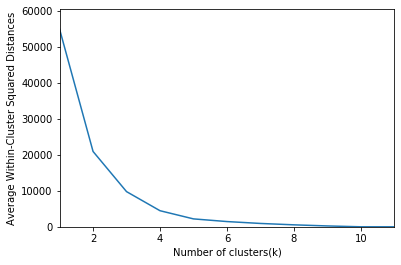

In [35]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_df_rate_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [36]:
# Identify  and display cluster centroids (mean values)  
# for each of 8 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_4.cluster_centers_, 
                    columns=train_df_rate_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 4')
centroids


Cluster Centroids for k-Means Clustering with k = 4


,Reached_on_Time_Y_N,Customer_rating_2,Customer_rating_3,Customer_rating_4,Customer_rating_5,Cluster
0,-2.939e-03,-0.495,-0.506,2.006,-0.496,Cluster 0
1,1.851e-04,-0.495,0.737,-0.498,-0.496,Cluster 1
2,2.027e-02,-0.495,-0.506,-0.498,2.016,Cluster 2
3,-1.773e-02,2.020,-0.506,-0.498,-0.496,Cluster 3


<Figure size 1152x432 with 0 Axes>

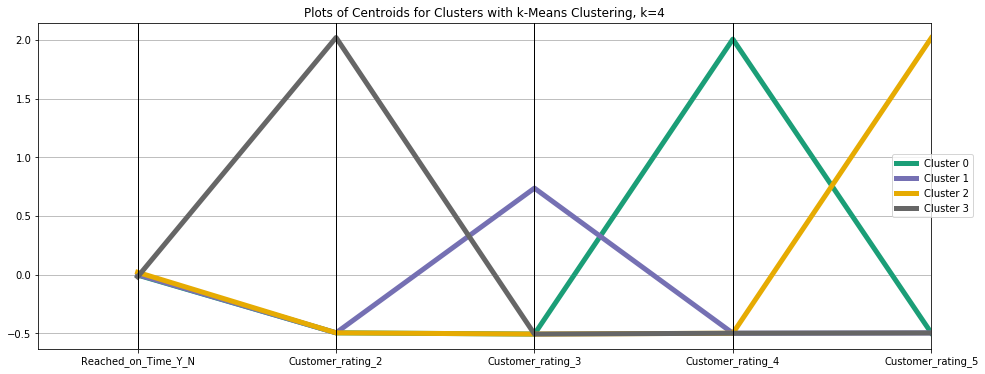

In [37]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
fig = plt.figure(figsize=(16, 6))
plt.figure(figsize=(16,6))
fig.subplots_adjust(right=6)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,4)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=4')
plt.show()

Heatmap for k-Means Clustering with 4 Clusters


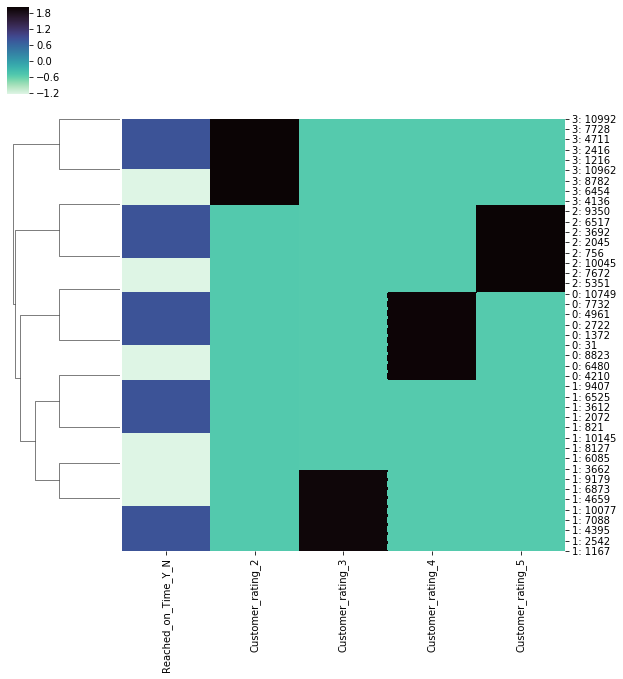

In [38]:
# Create and display heatmap for Utulities k-mean clustering 
# with centroid method. 
train_df_rate_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km4, train_df_rate_norm.index)]
sns.clustermap(train_df_rate_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 4 Clusters')
plt.show()

In [39]:
train_df_cust = train_df[['Customer_care_calls', 
       'Discount_offered', 'Reached_on_Time_Y_N']]

In [40]:

# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
train_df_cust = train_df_cust.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
train_df_cust_norm = (train_df_cust - train_df_cust.mean())/train_df_cust.std()

# Use KMeans() function to create k-means clusters with k=4 (n_clusters=4). 
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(train_df_cust_norm)

# Develop cluster membership for k-means clusters, k=4.
memb_km4 = pd.Series(kmeans_4.labels_, index=train_df_cust_norm.index)

# Display cluster memberships for 4 clusters.  
print('Cluster Membership for 4 Clusters Using k-Means Clustering')
print()
for key, item in memb_km4.groupby(memb_km4):
    print(str(key) + " : " + str(item.index))
 
    

Cluster Membership for 4 Clusters Using k-Means Clustering

0 : Int64Index([   1,    2,    3,    5,    8,   10,   12,   14,   15,   16,
            ...
            3118, 3120, 3121, 3122, 3125, 3126, 3127, 3131, 3132, 3134],
           dtype='int64', name='ID', length=1770)
1 : Int64Index([ 3136,  3137,  3138,  3139,  3141,  3144,  3145,  3146,  3147,
             3148,
            ...
            10982, 10989, 10990, 10991, 10993, 10994, 10996, 10997, 10998,
            10999],
           dtype='int64', name='ID', length=4317)
2 : Int64Index([   19,    41,    46,    49,    71,    72,    75,    88,    92,
              120,
            ...
            10943, 10944, 10946, 10949, 10959, 10983, 10985, 10986, 10988,
            10992],
           dtype='int64', name='ID', length=1748)
3 : Int64Index([    4,     6,     7,     9,    11,    13,    17,    23,    24,
               27,
            ...
            10954, 10955, 10963, 10964, 10973, 10980, 10981, 10984, 10987,
            10995]

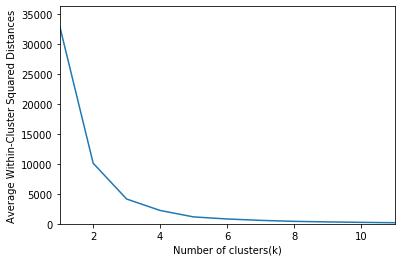

In [41]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_df_cust_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [42]:
# Identify  and display cluster centroids (mean values)  
# for each of 8 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_4.cluster_centers_, 
                    columns=train_df_cust_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 4')
centroids


Cluster Centroids for k-Means Clustering with k = 4


,Customer_care_calls,Discount_offered,Reached_on_Time_Y_N,Cluster
0,-0.300,2.097,0.822,Cluster 0
1,0.013,-0.483,-1.216,Cluster 1
2,1.314,-0.361,0.683,Cluster 2
3,-0.576,-0.315,0.822,Cluster 3


<Figure size 1152x432 with 0 Axes>

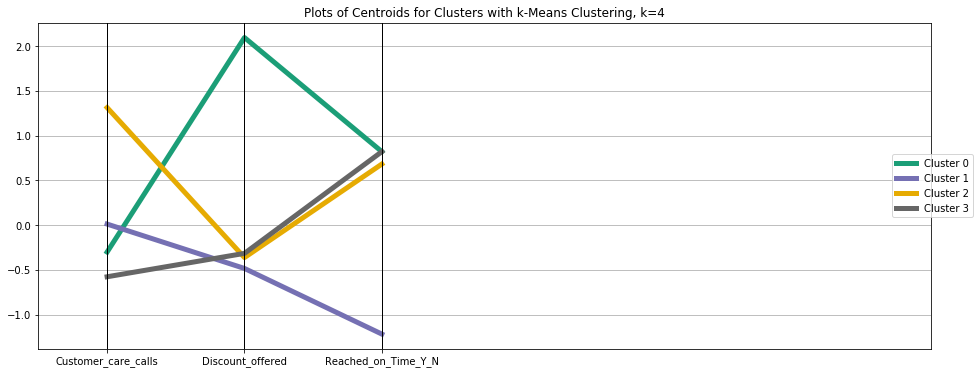

In [43]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
fig = plt.figure(figsize=(16, 6))
plt.figure(figsize=(16,6))
fig.subplots_adjust(right=6)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,6)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=4')
plt.show()

Heatmap for k-Means Clustering with 4 Clusters


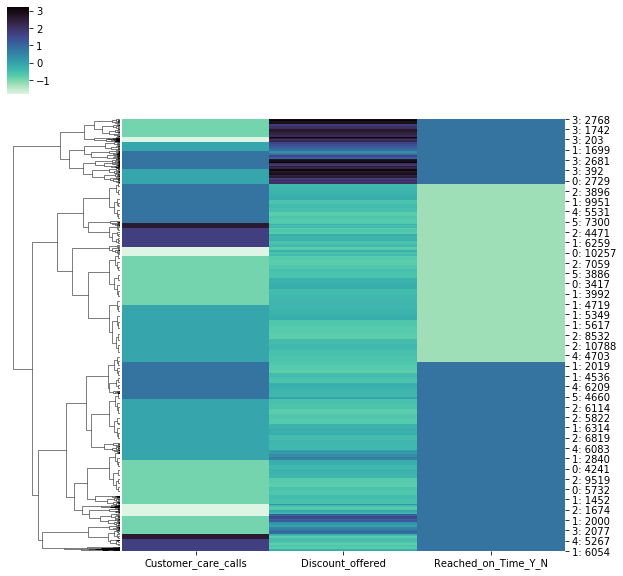

In [44]:
# Create and display heatmap for Utulities k-mean clustering 
# with centroid method. 
train_df_cust_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km6, train_df_cust_norm.index)]
sns.clustermap(train_df_cust_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 4 Clusters')
plt.show()

In [45]:
train_df_prod = train_df[['Reached_on_Time_Y_N',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5', 'Product_importance_low',
       'Product_importance_medium']]

In [46]:


# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
train_df_prod = train_df_prod.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
train_df_prod_norm = (train_df_prod - train_df_prod.mean())/train_df_prod.std()

# Use KMeans() function to create k-means clusters with k=4 (n_clusters=4). 
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(train_df_prod_norm)

# Develop cluster membership for k-means clusters, k=4.
memb_km4 = pd.Series(kmeans_4.labels_, index=train_df_prod_norm.index)

# Display cluster memberships for 6 clusters.  
print('Cluster Membership for 4 Clusters Using k-Means Clustering')
print()
for key, item in memb_km4.groupby(memb_km4):
    print(str(key) + " : " + str(item.index))
 
    

Cluster Membership for 4 Clusters Using k-Means Clustering

0 : Int64Index([    7,     9,    11,    14,    17,    30,    31,    36,    38,
               47,
            ...
            10949, 10950, 10961, 10968, 10969, 10971, 10978, 10981, 10991,
            10997],
           dtype='int64', name='ID', length=2189)
1 : Int64Index([    4,     6,    12,    13,    18,    20,    21,    22,    24,
               25,
            ...
            10957, 10963, 10964, 10984, 10985, 10987, 10990, 10993, 10995,
            10996],
           dtype='int64', name='ID', length=3051)
2 : Int64Index([    1,     3,     5,    10,    34,    35,    40,    66,    67,
               69,
            ...
            10962, 10970, 10974, 10975, 10976, 10977, 10980, 10982, 10992,
            10998],
           dtype='int64', name='ID', length=2165)
3 : Int64Index([    2,     8,    15,    16,    19,    23,    26,    27,    29,
               32,
            ...
            10967, 10972, 10973, 10979, 10983, 10

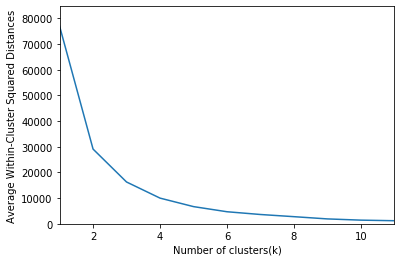

In [47]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_df_prod_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [48]:
# Identify  and display cluster centroids (mean values)  
# for each of 8 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_4.cluster_centers_, 
                    columns=train_df_prod_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 4')
centroids


Cluster Centroids for k-Means Clustering with k = 4


,Reached_on_Time_Y_N,Customer_rating_2,Customer_rating_3,Customer_rating_4,Customer_rating_5,Product_importance_low,Product_importance_medium,Cluster
0,-0.003,-0.495,-0.506,2.006,-0.496,0.005,-0.009,Cluster 0
1,0.008,-0.495,0.459,-0.498,0.273,-0.964,1.024,Cluster 1
2,-0.018,2.020,-0.506,-0.498,-0.496,-0.026,0.014,Cluster 2
3,0.005,-0.495,0.223,-0.498,0.369,0.830,-0.872,Cluster 3


<Figure size 1152x432 with 0 Axes>

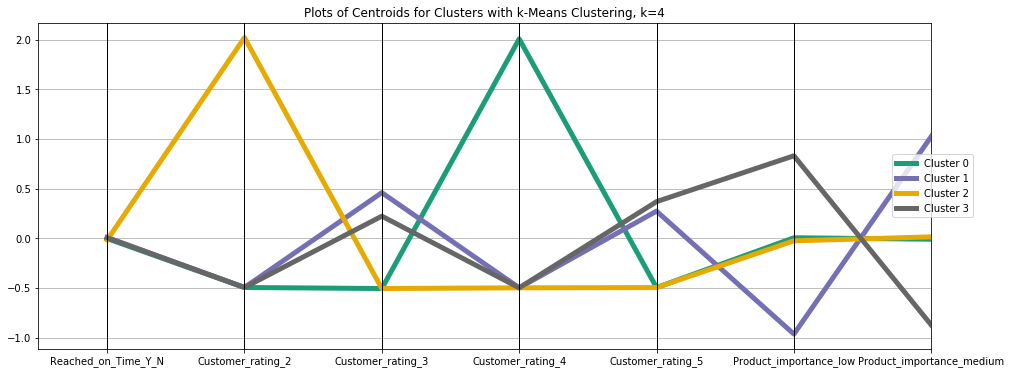

In [49]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
fig = plt.figure(figsize=(16, 6))
plt.figure(figsize=(16,6))
fig.subplots_adjust(right=6)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,6)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=4')
plt.show()

Heatmap for k-Means Clustering with 4 Clusters


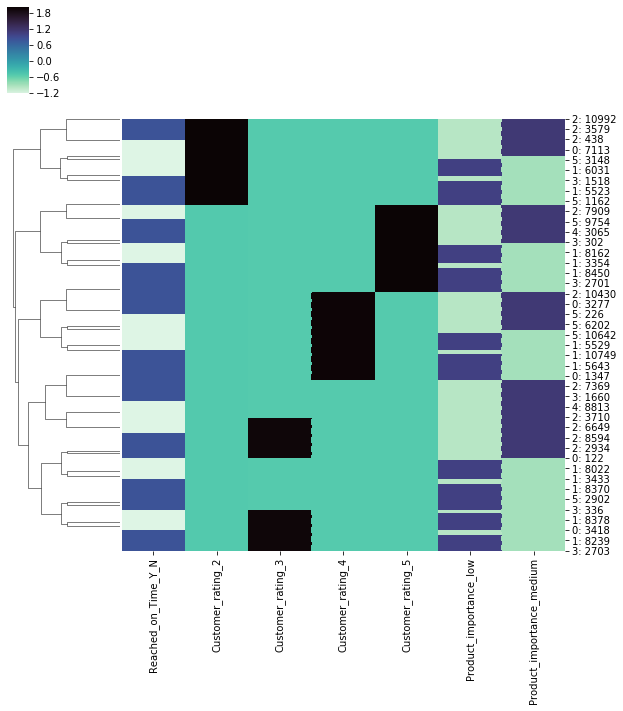

In [50]:
# Create and display heatmap for Utulities k-mean clustering 
# with centroid method. 
train_df_prod_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km6, train_df_prod_norm.index)]
sns.clustermap(train_df_prod_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 4 Clusters')
plt.show()